# Sanofi Paul Ricard
This notebook is being used to generate a nice image of cars around the Paul Ricard ciruit.

In [2]:
# import libraries
import plotly.graph_objects as go
import pandas as pd
import fastf1 as ff1
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/mark_/Documents/McLaren2021/Sanofi/Race Dashboard data/leaderboard.csv')
df.head()


,Unnamed: 0,Line,2021-04-15 00:00:00,2021-05-13 00:00:00,2021-06-10 00:00:00,2021-07-08 00:00:00,2021-08-19 00:00:00,race_time,prev_race_time,Plant,position,gap_to_leader,prev_position,Gain/Loss,interval,OEE Start point,⇗ OEE% progress,OEE% Target (2022)
0,0,GAMMA1,89.150971,79.525767,79.076756,64.979194,91.578739,404.311428,312.732689,SCOPPITO,1,0.000000,1,0,NaN,0.418683,0.145671,0.650
1,1,IMA C80/2,88.907660,79.456522,82.482693,64.674113,90.938638,406.459626,315.520988,SCOPPITO,2,2.148199,2,0,2.148199,0.451031,0.194427,0.650
2,2,C9 Packaging Line,88.910061,89.747841,90.361488,72.580804,90.591859,432.192053,341.600194,Maisons-Alfort,3,27.880626,3,0,25.732427,0.419899,0.132906,0.530
3,3,AL6,89.135255,90.323044,87.005598,75.552144,90.530838,432.546878,342.016040,Frankfurt,4,28.235451,4,0,0.354825,0.332657,0.065632,0.485
4,4,AL5 Packaging 1,89.128323,89.725754,90.495004,75.207724,91.870378,436.427184,344.556805,Frankfurt,5,32.115756,5,0,3.880306,0.479693,0.013141,0.500


In [4]:
cars = df[['Line', 'gap_to_leader']]

In [5]:
# ff1.Cache.enable_cache('f1_cache')
ff1.Cache.enable_cache('C:/Users/mark_/Documents/McLaren2021/Sanofi/f1_cache')
laps = ff1.get_session(2020, 'Belgium', 'Q').load_laps(with_telemetry=True)
tel = laps.pick_driver('NOR').pick_fastest().telemetry

core           INFO 	Loading laps for Belgian Grand Prix - Qualifying [v2.1.6]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['23', '11', '33', '63', '77', '10', '16', '99', '7', '26', '5', '20', '6', '18', '8', '31', '3', '44', '55', '4']


In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.style.use('dark_background')

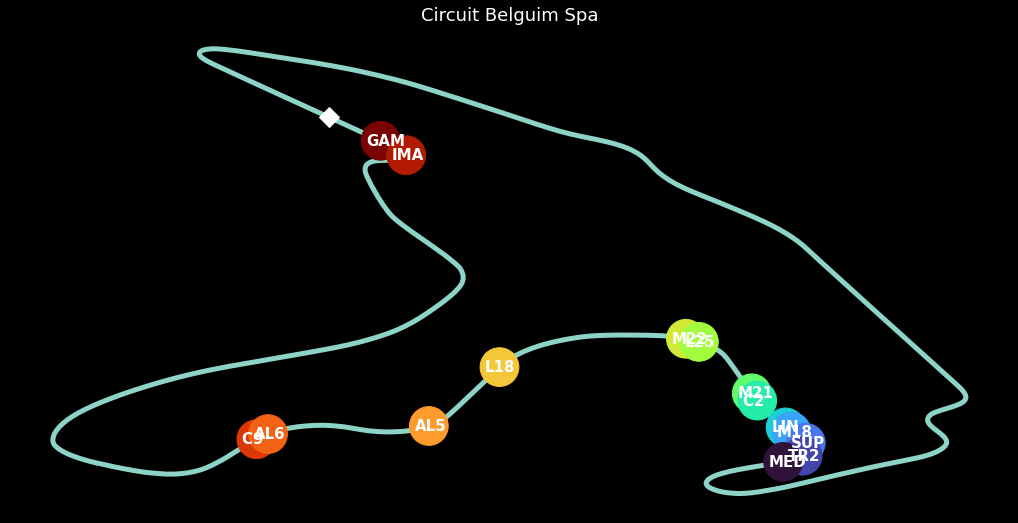

In [17]:
plt.figure(figsize=(18,9))
plt.plot(tel.X, tel.Y, zorder=1, lw=5)


result_x=[]
result_y=[]

t = np.linspace(1,15,len(cars))

# im = plt.imread(dir + 'chequeredFlag.png')
# plt.imshow(im,zorder=1)  

# spaces the cars out around the track
multiplier=-10
# more micro adjustment of car positioning
offset_for_cars=10

# show where the start / finish line is
start_x=[]
start_y=[]
start_x.__iadd__([tel.X.iloc[int(1)]])
start_y.__iadd__([tel.Y.iloc[int(1)]])


for i, row in cars.iterrows():
    # result_x.__iadd__([tel.X.iloc[int(-15*(row[1]+1))]])
    # result_y.__iadd__([tel.Y.iloc[int(-15*(row[1]+1))]])
    result_x.__iadd__([tel.X.iloc[int(multiplier*(row[1]+1))-offset_for_cars]])
    result_y.__iadd__([tel.Y.iloc[int(multiplier*(row[1]+1))-offset_for_cars]])
    

plt.scatter(result_x, result_y, s=1500, c=t, cmap='turbo_r', zorder=2)
font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

for i, row in cars.iterrows():
    # plt.text(tel.X.iloc[int(-15*(row[1]+1))]-250, tel.Y.iloc[int(-15*(row[1]+1))]-200, row[0][:3], c='white')
    plt.text(tel.X.iloc[int(multiplier*(row[1]+1))-offset_for_cars]-200, tel.Y.iloc[int(multiplier*(row[1]+1))-offset_for_cars]-200, row[0][:3], c='white')

plt.scatter(start_x, start_y, marker = 'D', c='white', zorder=2, s=200)
    
# grid(color='r', linestyle='-', linewidth=2)
# plt.scatter(300, -1930, marker = 's', c='white', zorder=2)
# plt.scatter(600, -1930, marker = 's', c='white', zorder=2)
# plt.scatter(460, -2130, marker = 's', c='white', zorder=2)
# plt.scatter(300, -2130, marker = 's', c='black', zorder=2)  
# plt.scatter(460, -1930, marker = 's', c='black', zorder=2)  
# plt.scatter(600, -2130, marker = 's', c='black', zorder=2)  
    
# for i, row in cars.iterrows():
#     plt.scatter(tel.X.iloc[int(-15*(row[1]+1))], tel.Y.iloc[int(-15*(row[1]+1))], s = 1000, c=t, cmap='Oranges', zorder=2)
#     plt.text(tel.X.iloc[int(-15*(row[1]+1))]-200, tel.Y.iloc[int(-15*(row[1]+1))], row[0][:3], c='white')

plt.title('Circuit Belguim Spa')
plt.axis('off')
plt.show()

In [16]:
tel.Y.iloc[-1]

-1932

NameError: name 'df_weekly' is not defined